In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/income.csv')

In [3]:
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:
df.shape

(32561, 14)

In [5]:
df.duplicated().sum()

np.int64(3465)

In [6]:
duplicates = df[df.duplicated(keep=False)]  # Display duplicate rows
duplicates

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
12,23,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
17,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,0
20,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1
26,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0
29,49,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32503,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
32512,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,0
32527,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


In [7]:
df.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [9]:
 # Check for missing values
df = df.dropna()  # Drop rows with missing values

In [10]:
df = df[df['native-country'] == 'United-States']  # Filter for United States
df.drop('native-country', axis=1, inplace=True)

In [11]:
numeric_columns_df = df.select_dtypes(include=['int64', 'float64'])

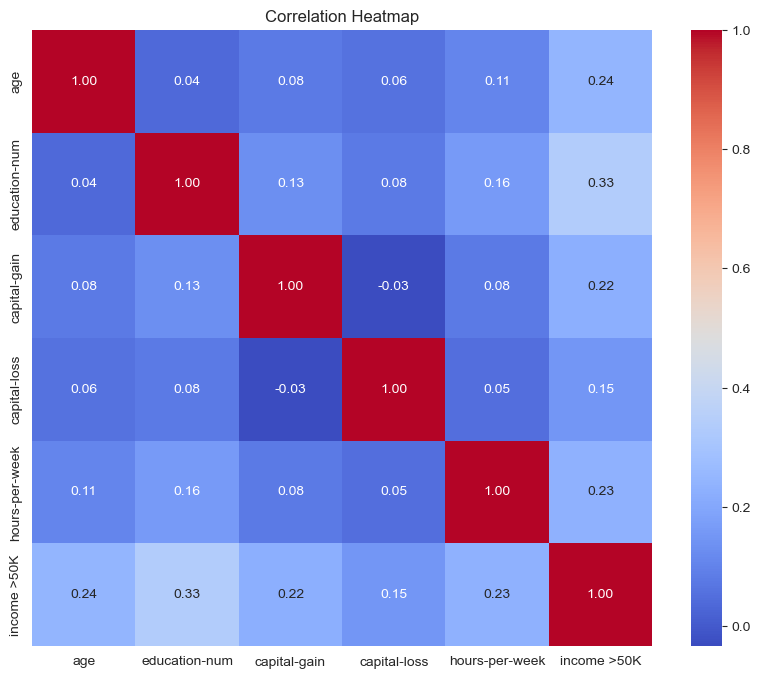

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

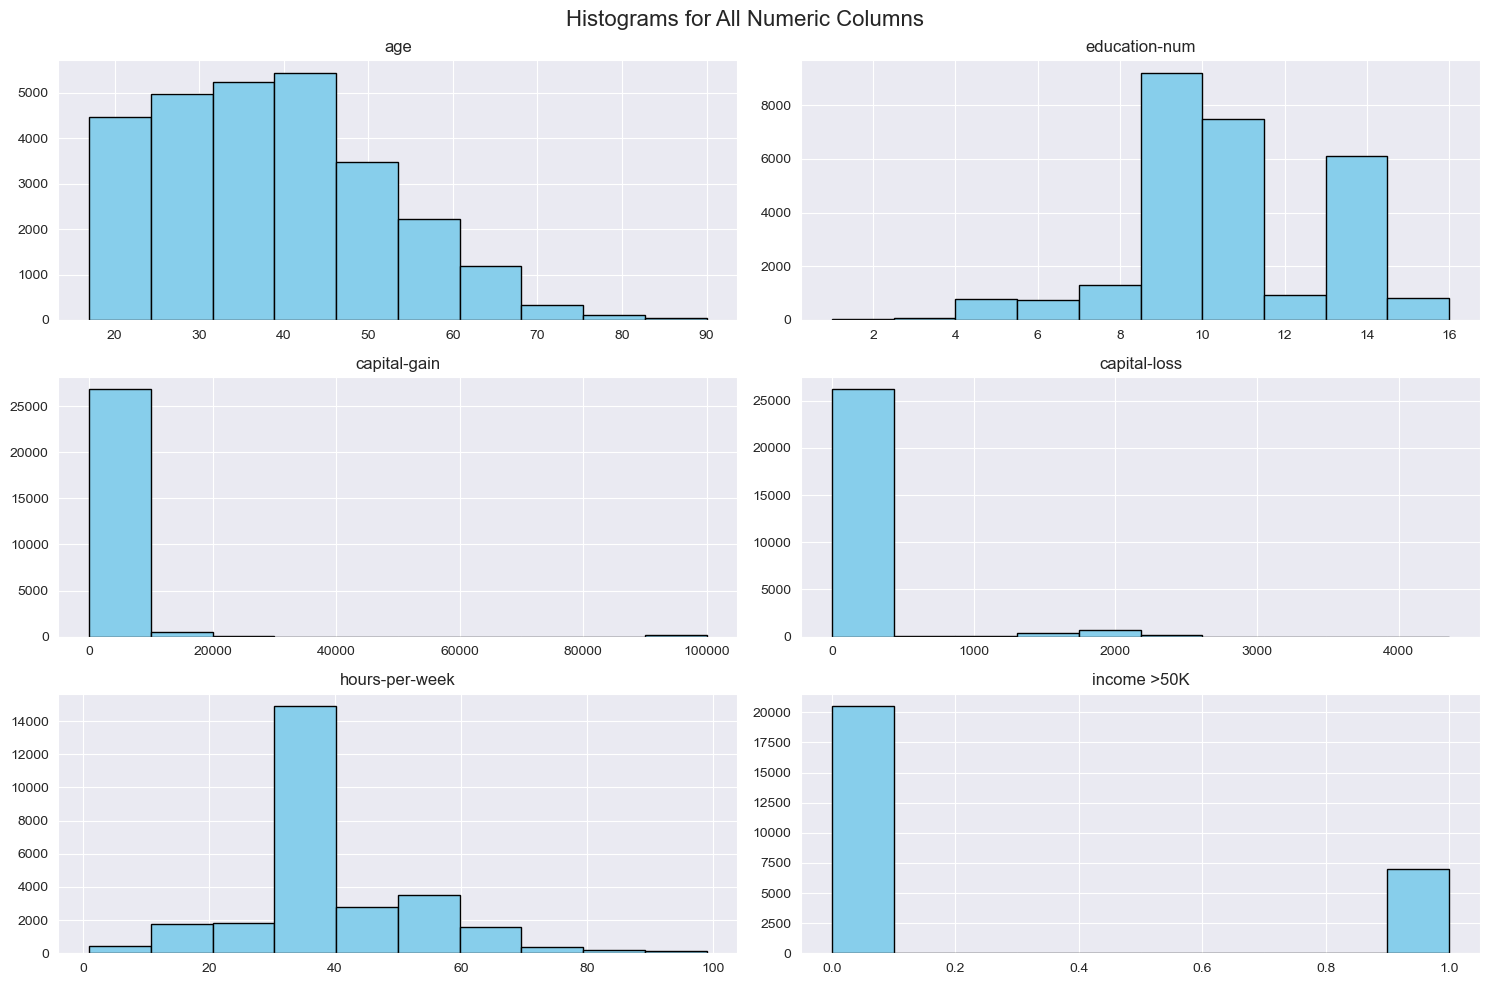

In [13]:
numeric_columns_df.hist(figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for All Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

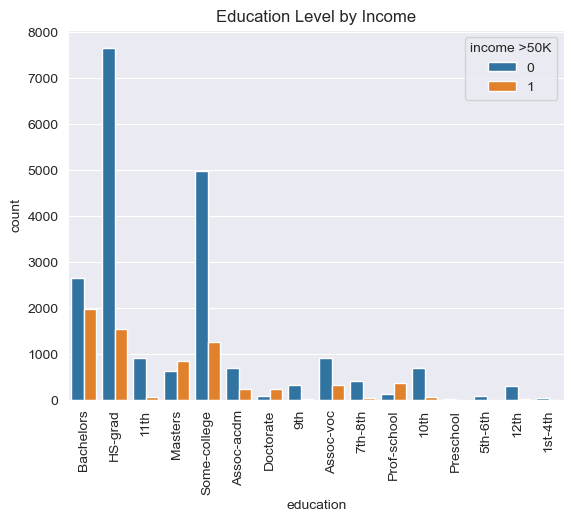

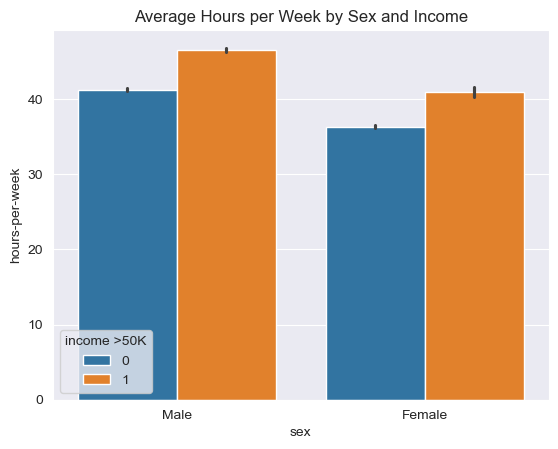

In [14]:
# Count Plot
sns.countplot(data=df, x='education', hue='income >50K')
plt.xticks(rotation=90)
plt.title('Education Level by Income')
plt.show()

# Bar Plot
sns.barplot(data=df, x='sex', y='hours-per-week', hue='income >50K')
plt.title('Average Hours per Week by Sex and Income')
plt.show()

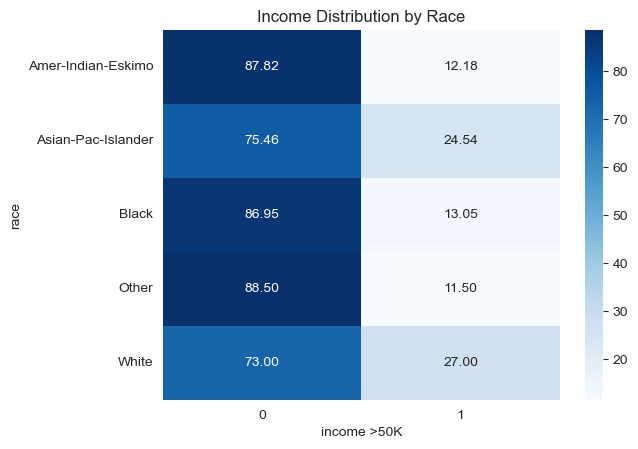

In [15]:
cross_tab = pd.crosstab(df['race'], df['income >50K'], normalize='index') * 100
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.title('Income Distribution by Race')
plt.show()

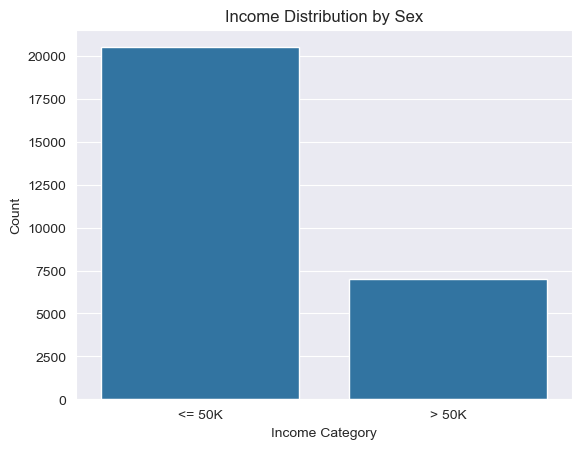

In [16]:
sns.countplot(data=df, x='income >50K')
plt.title('Income Distribution by Sex')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['<= 50K', '> 50K'])
plt.show()

In [17]:
X = df.drop('income >50K', axis=1)
y = df['income >50K']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [18]:
nominal_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race']
ordinal_columns = ['education', 'sex']
numeric_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
all_columns = numeric_columns + nominal_columns + ordinal_columns

In [19]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns]), columns=numeric_columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns, index=X_test.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_columns]), columns=numeric_columns, index=X_val.index)

In [20]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_ohe = pd.DataFrame(one_hot_encoder.fit_transform(X_train[nominal_columns]),
                           columns=one_hot_encoder.get_feature_names_out(nominal_columns),
                           index=X_train.index)
X_test_ohe = pd.DataFrame(one_hot_encoder.transform(X_test[nominal_columns]),
                          columns=one_hot_encoder.get_feature_names_out(nominal_columns),
                          index=X_test.index)
X_val_ohe = pd.DataFrame(one_hot_encoder.transform(X_val[nominal_columns]),
                         columns=one_hot_encoder.get_feature_names_out(nominal_columns),
                         index=X_val.index)

In [21]:
ordinal_encoder = OrdinalEncoder()
X_train_ord = pd.DataFrame(ordinal_encoder.fit_transform(X_train[ordinal_columns]),
                           columns=ordinal_columns, index=X_train.index)
X_test_ord = pd.DataFrame(ordinal_encoder.transform(X_test[ordinal_columns]),
                          columns=ordinal_columns, index=X_test.index)
X_val_ord = pd.DataFrame(ordinal_encoder.transform(X_val[ordinal_columns]),
                         columns=ordinal_columns, index=X_val.index)

In [22]:
X_train_processed = pd.concat([X_train_scaled, X_train_ohe, X_train_ord], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test_ohe, X_test_ord], axis=1)
X_val_processed = pd.concat([X_val_scaled, X_val_ohe, X_val_ord], axis=1)

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_processed, y_train)
y_pred = knn.predict(X_train_processed)
print(f'KNN Accuracy:', accuracy_score(y_train, y_pred))
train_scores = cross_val_score(knn, X_train_processed, y_train, cv=5, scoring='f1')
print("cross_val_scores for train set: ", train_scores)
train_avg_acc = np.mean(train_scores)
print("cross_val avg acc for train set: ", train_avg_acc)

KNN Accuracy: 0.8964973942552418
cross_val_scores for train set:  [0.63470874 0.61172161 0.63278887 0.63739021 0.63444857]
cross_val avg acc for train set:  0.6302116013156236


In [34]:
grid_search = GridSearchCV(knn, param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}, cv=5, scoring='f1')
grid_search.fit(X_val_processed, y_val)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]}, scoring='f1')

In [25]:
best_knn = grid_search.best_estimator_
best_k = grid_search.best_params_['n_neighbors']

In [26]:
cv_scores = cross_val_score(best_knn, X_val_processed, y_val, cv=5)
print("cross_val_scores for CV set: ", cv_scores)
cv_avg_acc = np.mean(cv_scores)
print("cross_val avg acc for CV set: ", cv_avg_acc)
test_scores = cross_val_score(best_knn, X_test_processed, y_test, cv=5)
print("cross_val_scores for train set: ", test_scores)
test_avg_acc = np.mean(test_scores)
print("cross_val avg acc for train set: ", test_avg_acc)

cross_val_scores for train set:  [0.82702211 0.82914268 0.83121212 0.83515152 0.82878788]
cross_val avg acc for train set:  0.8302632627394821
cross_val_scores for CV set:  [0.8147139  0.83       0.80818182 0.84727273 0.81181818]
cross_val avg acc for CV set:  0.8223973247460986
cross_val_scores for train set:  [0.81017257 0.81818182 0.83       0.82727273 0.81545455]
cross_val avg acc for train set:  0.820216332259929


In [27]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_pred = final_knn.predict(X_test_processed)
score = accuracy_score(y_test, y_pred)
print(f'Final KNN Accuracy: {score:.2f}')
print("Best K Parameter: ", best_k)
print("Final cross-validation score: ", grid_search.best_score_)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best KNN Accuracy: 0.83
Best K Parameter:  7
Best cross-validation score:  0.6093991673358612
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4092
           1       0.69      0.60      0.64      1409

    accuracy                           0.83      5501
   macro avg       0.78      0.75      0.77      5501
weighted avg       0.82      0.83      0.83      5501



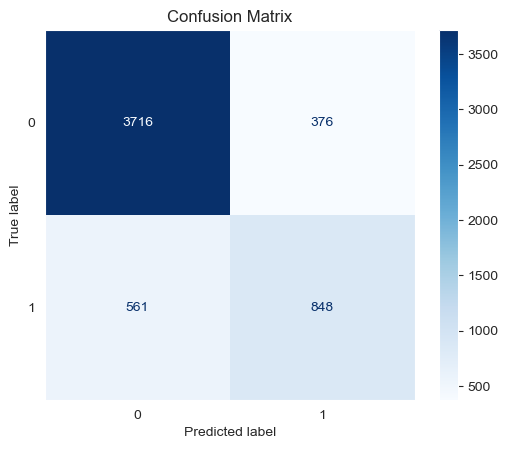

In [31]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()